<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [24]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

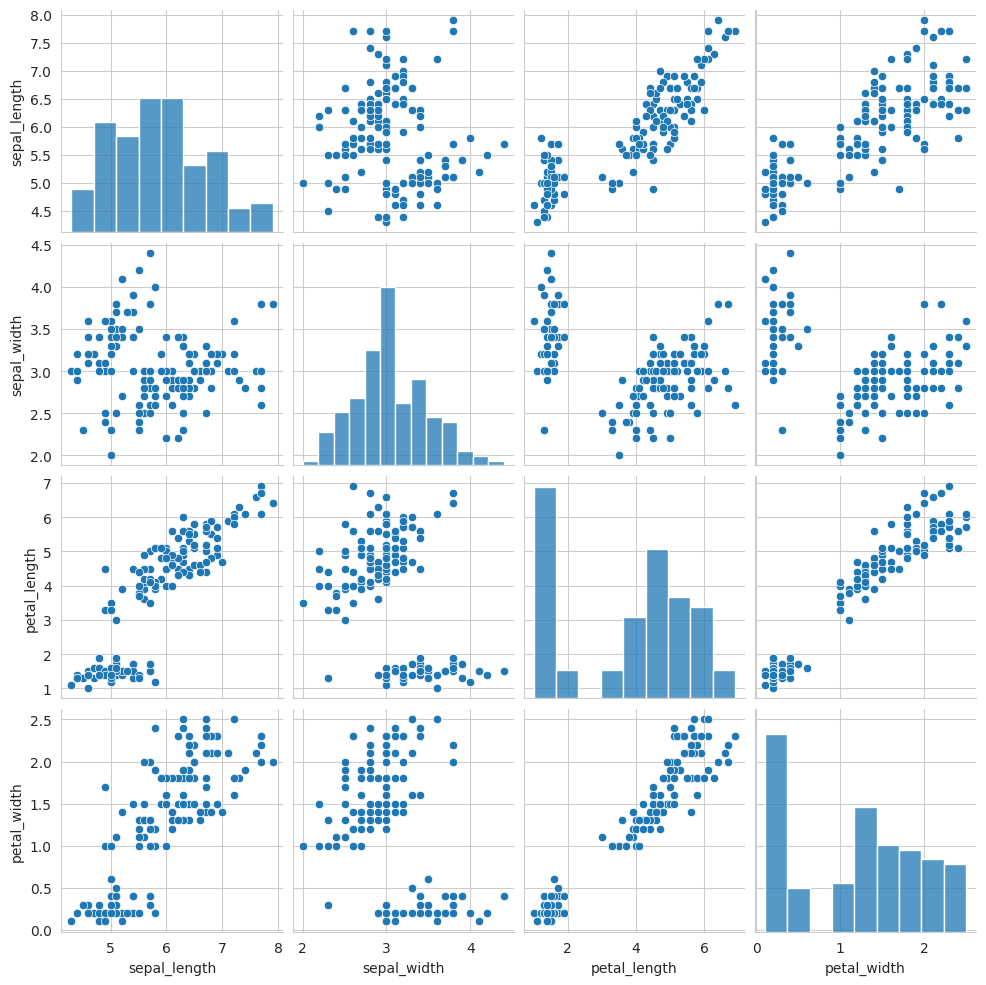

In [27]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** As 04 variáveis preditivas (sepal length, sepal width, petal length, petal width) tem a possibilidade de estarem em um cluster. Se olharmos para o petal width, podemos ver gurpos com:

Grupos que apresentam : Baixo petal length e baixo petal width;
Grupos que apresentam : Alto petal length e alto petal width;

Isso pode ser o indicativo para grupos bem determinados a partir das variáveis preditivas.

## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [7]:
# resposta da questão 2.1

iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


Este resultado indica que não há valores faltantes em nenhuma das colunas da sua base de dados iris.

### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Algoritmos de clusterização, como o K-Means , calculam distâncias entre os pontos. Se as variáveis estiverem em escalas muito diferentes, aquelas com maiores desvios padrão (como petal_length) tendem a dominar o cálculo da distância, subestimando a importância de variáveis com menores desvios padrão (como sepal_width). Isso pode levar a resultados de agrupamento distorcidos. Vou precisar escalar as variáveis.

In [28]:
# resposta da questão 2.2
from sklearn.preprocessing import StandardScaler

# Seleciona apenas as colunas que você quer padronizar
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Inicializa o scaler
scaler = StandardScaler()

# Aplica o scaler e cria novas colunas padronizadas
for feature in features:
    iris[feature + '_std'] = scaler.fit_transform(iris[[feature]])

# Exibe as primeiras linhas para verificar as novas colunas
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  sepal_length_std  \
0           5.1          3.5           1.4          0.2         -0.900681   
1           4.9          3.0           1.4          0.2         -1.143017   
2           4.7          3.2           1.3          0.2         -1.385353   
3           4.6          3.1           1.5          0.2         -1.506521   
4           5.0          3.6           1.4          0.2         -1.021849   

   sepal_width_std  petal_length_std  petal_width_std  
0         1.019004         -1.340227        -1.315444  
1        -0.131979         -1.340227        -1.315444  
2         0.328414         -1.397064        -1.315444  
3         0.098217         -1.283389        -1.315444  
4         1.249201         -1.340227        -1.315444  


### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [29]:
# resposta da questão 2.3
# Lista das colunas originais que foram padronizadas
original_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Descartar as colunas originais
iris = iris.drop(columns=original_columns)

print(iris.head())

   sepal_length_std  sepal_width_std  petal_length_std  petal_width_std
0         -0.900681         1.019004         -1.340227        -1.315444
1         -1.143017        -0.131979         -1.340227        -1.315444
2         -1.385353         0.328414         -1.397064        -1.315444
3         -1.506521         0.098217         -1.283389        -1.315444
4         -1.021849         1.249201         -1.340227        -1.315444


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [30]:
from sklearn.cluster import KMeans

# resposta da questão 3.1
wcss = []

for k in range(1,11):
  modelo = KMeans(n_clusters=k)
  modelo = modelo.fit(iris)
  wcss.append(modelo.inertia_)

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [31]:
clusters = modelo.labels_
clusters = pd.DataFrame(clusters, columns=['Cluster'])
iris_clustered = pd.concat([iris, clusters], axis=1)
iris_clustered.tail()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,Cluster
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,7
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2
149,0.068662,-0.131979,0.762758,0.790671,6


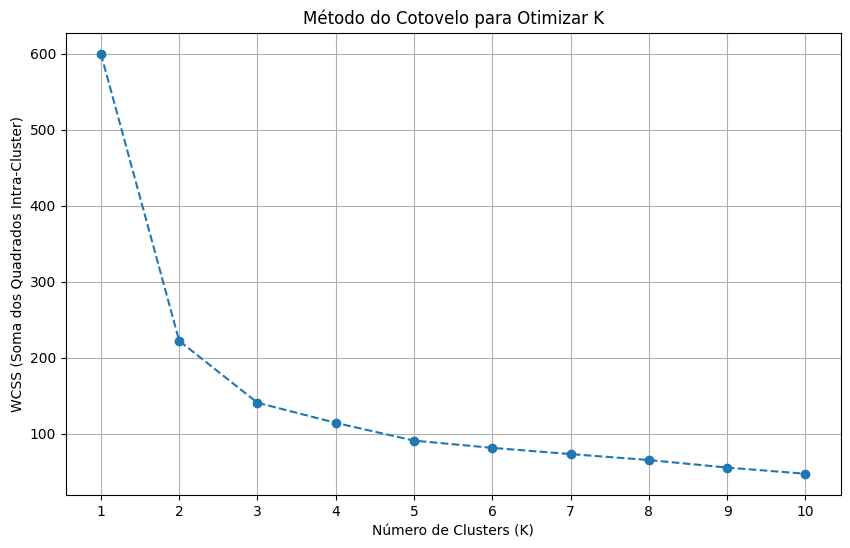

In [32]:
# resposta da questão 3.2
import matplotlib.pyplot as plt

# Gerar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Otimizar K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Soma dos Quadrados Intra-Cluster)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Com base no método do cotovelo, o número ideal de clusters para o seu conjunto de dados Iris (sem a coluna species e com variáveis padronizadas) é K = 3. Isso é consistente com o conhecimento prévio de que o conjunto de dados Iris original possui 3 espécies distintas.

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [33]:
# resposta da questão 3.3.a
from sklearn.cluster import KMeans

# Treinando o modelo K-Means com o número ideal de clusters (K=3)
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_optimal.fit(iris)

clusters = kmeans_optimal.labels_

# Convertendo para DataFrame e concatenando com os dados originais (padronizados)
clusters_df = pd.DataFrame(clusters, columns=['Cluster'])
iris_clustered = pd.concat([iris, clusters_df], axis=1)

print("DataFrame com a coluna 'Cluster' adicionada:")
print(iris_clustered.tail())

DataFrame com a coluna 'Cluster' adicionada:
     sepal_length_std  sepal_width_std  petal_length_std  petal_width_std  \
145          1.038005        -0.131979          0.819596         1.448832   
146          0.553333        -1.282963          0.705921         0.922303   
147          0.795669        -0.131979          0.819596         1.053935   
148          0.432165         0.788808          0.933271         1.448832   
149          0.068662        -0.131979          0.762758         0.790671   

     Cluster  
145        2  
146        0  
147        2  
148        2  
149        0  


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

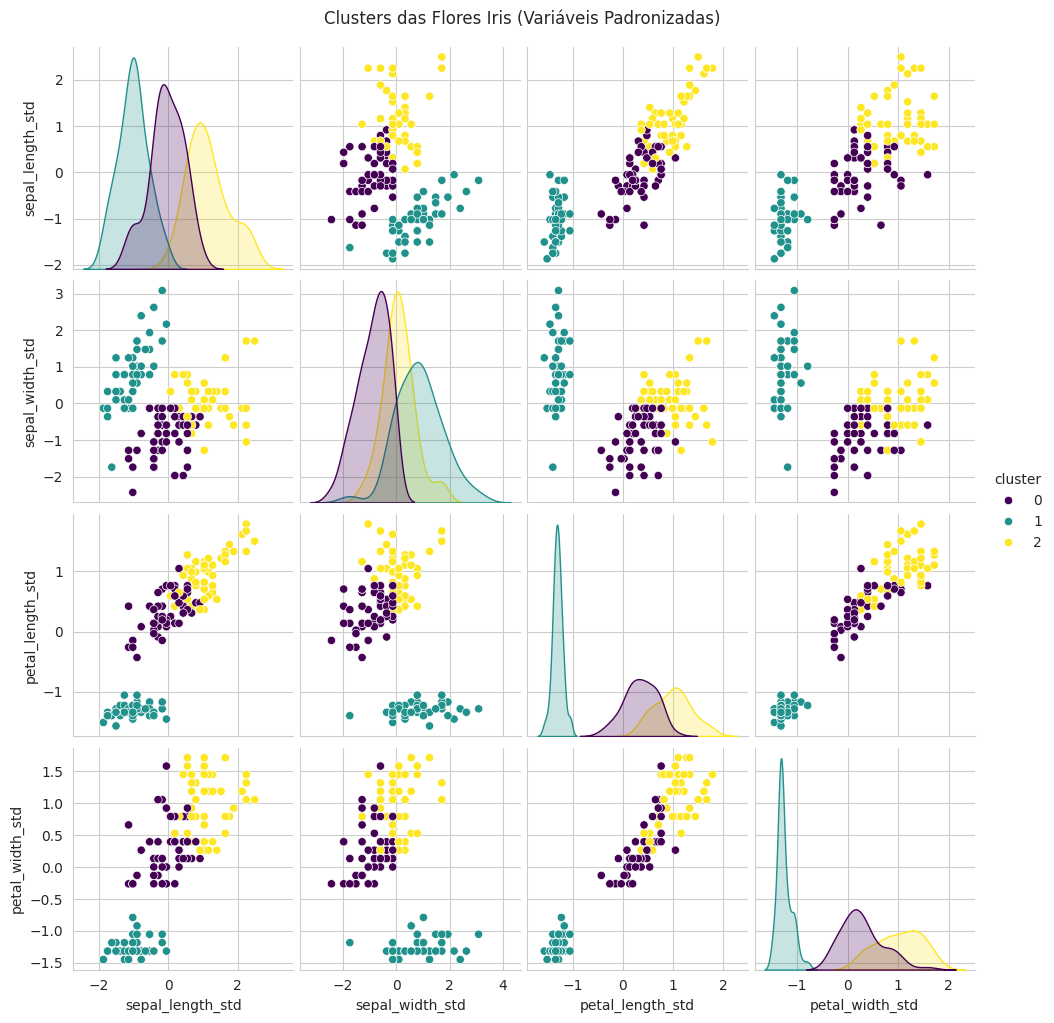

In [35]:
# resposta da questão 3.3.b
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=iris, hue='cluster', palette="viridis")
    plt.suptitle('Clusters das Flores Iris (Variáveis Padronizadas)', y=1.02)
    plt.show()

**Comentário:**


*  O grupo menor e mais afastado é composto por 2 clusters (0 e 4) que estão bem misturados

* O grupo maior é formado 3 clusters (1, 2 e 3); o cluster 1 é uma transição entre os clusters 3 e 2



## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [49]:
# resposta da questão 4.1
iris.head()

,sepal_length_std,sepal_width_std,petal_length_std,petal_width_std,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [58]:
media_sepal_length = iris_data['sepal_length'].mean()
desvio_padrao_sepal_length = iris_data['sepal_length'].std()

media_sepal_width = iris_data['sepal_width'].mean()
desvio_padrao_sepal_width = iris_data['sepal_width'].std()

media_petal_length = iris_data['petal_length'].mean()
desvio_padrao_petal_length = iris_data['petal_length'].std()

media_petal_width = iris_data['petal_width'].mean()
desvio_padrao_petal_width = iris_data['petal_width'].std()


iris_scaled_features = pd.DataFrame({
    'sepal_length_std': (iris_data['sepal_length'] - media_sepal_length) / desvio_padrao_sepal_length,
    'sepal_width_std': (iris_data['sepal_width'] - media_sepal_width) / desvio_padrao_sepal_width,
    'petal_length_std': (iris_data['petal_length'] - media_petal_length) / desvio_padrao_petal_length,
    'petal_width_std': (iris_data['petal_width'] - media_petal_width) / desvio_padrao_petal_width
})


new_sepal_l = 5.1
new_sepal_w = 3.5
new_petal_l = 1.4
new_petal_w = 0.2

sepal_l_std = (new_sepal_l - media_sepal_length) / desvio_padrao_sepal_length
sepal_w_std = (new_sepal_w - media_sepal_width) / desvio_padrao_sepal_width
petal_l_std = (new_petal_l - media_petal_length) / desvio_padrao_petal_length
petal_w_std = (new_petal_w - media_petal_width) / desvio_padrao_petal_width

# Criar o array NumPy da flor padronizada
flor = np.array([sepal_l_std, sepal_w_std, petal_l_std, petal_w_std])

print("Características da nova flor (padronizadas):")
print(flor)

# Prever o cluster para a flor padronizada, ajustando a dimensão (1 linha, N colunas)
cluster = model.predict(flor.reshape(1, -1))

print(f"\nA flor seria alocada no Cluster: {cluster[0]}")

Características da nova flor (padronizadas):
[-0.89767388  1.01560199 -1.33575163 -1.31105215]

A flor seria alocada no Cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---